#Görüntü Boyutlandırma ve Yeniden Örnekleme

Giriş olarak 8-bit gri tonlamalı bir görüntü kullanılmıştır.

Görüntü, yatay ve dikey yönde yarı boyutuna düşürülerek alt örnekleme (downsampling) işlemi gerçekleştirilmiştir.

Yarı boyutlu görüntü, farklı enterpolasyon yöntemleri kullanılarak tekrar orijinal boyutuna büyütülmüştür.

Büyütme işlemi sırasında en yakın komşu, bilineer ve bikübik enterpolasyon yöntemleri uygulanmıştır.

Elde edilen sonuçlar, orijinal görüntü ile karşılaştırmalı olarak görselleştirilmiştir.

Kullanılan Enterpolasyon Yöntemlerinin Karşılaştırılması
**Nearest Neighbor (En Yakın Komşu)**

En basit ve en hızlı yöntemdir.

Yeni piksel değeri en yakın komşu pikselden alınır.

Bloklaşma ve merdiven basamağı etkisi oluşturur.

Görsel kalite düşüktür ancak hesaplama maliyeti çok azdır.

**Bilinear Interpolation**

Dört komşu pikselin ağırlıklı ortalaması alınır.

Daha yumuşak geçişler sağlar.

Kenar keskinliği bir miktar azalır.

Görsel kalite ve hesaplama maliyeti arasında dengeli bir yöntemdir.

**Bicubic Interpolation**

4×4’lük komşuluk (16 piksel) kullanır.

Kenar ve detayları daha iyi korur.

Görsel kalite en yüksektir.

Hesaplama maliyeti diğer yöntemlere göre daha fazladır.

Yeniden örnekleme işlemleri sonucunda, en yakın komşu enterpolasyonunun bloklaşma etkisine neden olduğu, bilineer enterpolasyonun daha yumuşak fakat detay kaybı içeren sonuçlar ürettiği, bikübik enterpolasyonun ise görsel kalite açısından en başarılı sonuçları verdiği gözlemlenmiştir. Ancak, bikübik yöntemin hesaplama maliyetinin daha yüksek olduğu değerlendirilmiştir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


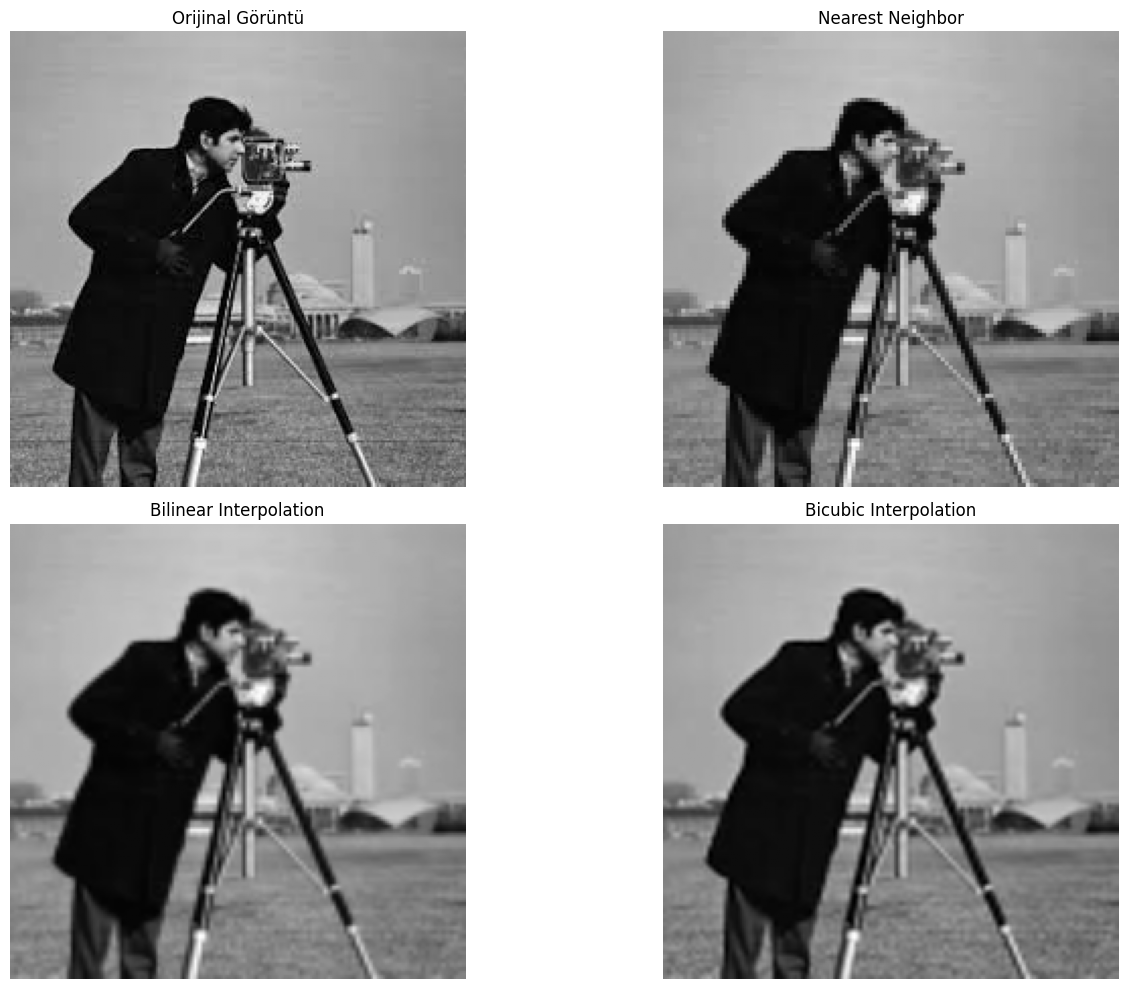

In [ ]:
# Gerekli kütüphanelerin içe aktarılması
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 8-bit gri tonlamalı görüntünün okunması
image_path = "/content/drive/MyDrive/Colab Notebooks/islem/cameraman_test_image_grayscale.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Görüntünün doğru yüklenip yüklenmediğini kontrol et
if image is None:
    raise ValueError("Görüntü yüklenemedi. Dosya yolunu kontrol ediniz.")

# Orijinal görüntü boyutları
h, w = image.shape

# 2. Görüntünün yatay ve dikey olarak yarı boyutuna indirilmesi
half_size = cv2.resize(
    image,
    (w // 2, h // 2),
    interpolation=cv2.INTER_AREA
)

# 3. Yarı boyutlu görüntünün tekrar orijinal boyuta büyütülmesi
# Farklı enterpolasyon yöntemleri ile

# En yakın komşu (Nearest Neighbor)
up_nearest = cv2.resize(
    half_size,
    (w, h),
    interpolation=cv2.INTER_NEAREST
)

# Bilineer enterpolasyon
up_bilinear = cv2.resize(
    half_size,
    (w, h),
    interpolation=cv2.INTER_LINEAR
)

# Bikübik enterpolasyon
up_bicubic = cv2.resize(
    half_size,
    (w, h),
    interpolation=cv2.INTER_CUBIC
)

# 4. Sonuçların görselleştirilmesi
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Görüntü")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(up_nearest, cmap='gray')
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(up_bilinear, cmap='gray')
plt.title("Bilinear Interpolation")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(up_bicubic, cmap='gray')
plt.title("Bicubic Interpolation")
plt.axis("off")

plt.tight_layout()
plt.show()
